In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [51]:
steamDF = pd.read_csv("HistoricalQuotes.csv")

Add Seasonality

In [52]:
steamDF["Date"] = pd.to_datetime(steamDF["Date"])
steamDF["Month"] =  steamDF['Date'].dt.month
steamDF["Year"] = steamDF['Date'].dt.year
steamDF["Quarter"] = steamDF['Month']
steamDF['Quarter'].replace([1,2,3], 1, inplace=True)
steamDF['Quarter'].replace([4,5,6], 2, inplace=True)
steamDF['Quarter'].replace([7,8,9], 3, inplace=True)
steamDF['Quarter'].replace([10,11,12], 4, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_24412\3351137242.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steamDF['Quarter'].replace([1,2,3], 1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24412\3351137242.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [53]:
#have to also convert ID number as "total time"

numbers = np.arange(len(steamDF), 0, -1)


steamDF['time'] = numbers

In [54]:
# has to be Volume
X = steamDF.drop('Volume', axis=1)  
y = steamDF['Volume'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state = 89)

## Isolate Time

In [55]:
dateDF = X["Date"]

if ("Date" in steamDF):
    steamDF.drop("Date", axis=1, inplace=True)
if ("Date" in X_train):
    X_train.drop("Date", axis=1, inplace=True)
if ("Date" in X_test):
    X_test.drop("Date", axis=1 , inplace=True)

In [56]:
steamDF.head()

,Close,Volume,Open,High,Low,Month,Year,Quarter,time
0,273.36,106721200,257.26,278.41,256.37,2,2020,1,2518
1,273.52,80151380,281.10,286.00,272.96,2,2020,1,2517
2,292.65,49678430,286.53,297.88,286.50,2,2020,1,2516
3,288.08,57668360,300.95,302.53,286.13,2,2020,1,2515
4,298.18,55548830,297.26,304.18,289.23,2,2020,1,2514


Convert Strings

In [57]:
dateDF

0      2020-02-28
1      2020-02-27
2      2020-02-26
3      2020-02-25
4      2020-02-24
          ...    
2513   2010-03-05
2514   2010-03-04
2515   2010-03-03
2516   2010-03-02
2517   2010-03-01
Name: Date, Length: 2518, dtype: datetime64[ns]

## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() #empty template to be trained
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
len(y_test)

756

In [60]:
len(X_test)

756

In [61]:
predictions = linear_model.predict(X_test)

linear_model.score(X_test, predictions)

print(linear_model.score(X_test, y_test))

X_test['Residuals'] = (y_test - predictions)



0.6400974584651213


In [62]:
len(X_test)

756

## Receiving Inputs

In [63]:
inputDF = pd.read_csv("Book1.csv")

In [64]:
close1 = inputDF['Close'][0]
open1 = inputDF[' Open'][0]
volume1 = inputDF['Volume'][0]
high1 = inputDF[' High'][0]
low1 = inputDF[' Low'][0]

## Create Equation

In [65]:
coef = linear_model.coef_
coef


array([-5.56967265e+03,  1.50839349e+06,  1.08411767e+07, -1.22133765e+07,
       -5.88523491e+06, -4.87979243e+07,  3.16644347e+06,  1.12403070e+05])

In [66]:
#remember to check order

#the equation for revenue = [Price * Volume]
#                         = [Price * (coef*Price + coef*season + .... + residuals)]
#steamDF['optPrice'] = steamDF['Price']*coef[0]*2 + steamDF['']*coef[1] + residuals


In [67]:
values_test = pd.DataFrame( y_test, columns=['Values'])
values_test

,Values
0,104693151
1,27391950
2,48032600
3,50607747
4,22560440
...,...
751,50142667
752,66454720
753,54628650
754,108637023


In [68]:

timeDF = pd.concat([dateDF, values_test], axis=1)
timeDF

,Date,Values
0,2020-02-28,104693151.0
1,2020-02-27,27391950.0
2,2020-02-26,48032600.0
3,2020-02-25,50607747.0
4,2020-02-24,22560440.0
...,...,...
2513,2010-03-05,NaN
2514,2010-03-04,NaN
2515,2010-03-03,NaN
2516,2010-03-02,NaN


In [69]:
indexNull = timeDF[ timeDF['Date'].isnull()].index
timeDF.drop(indexNull, inplace=True)

indexNull = timeDF[ timeDF['Values'].isnull()].index
timeDF.drop(indexNull, inplace=True)


In [70]:
timeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    756 non-null    datetime64[ns]
 1   Values  756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


## Table1: Optimal Price vs Time

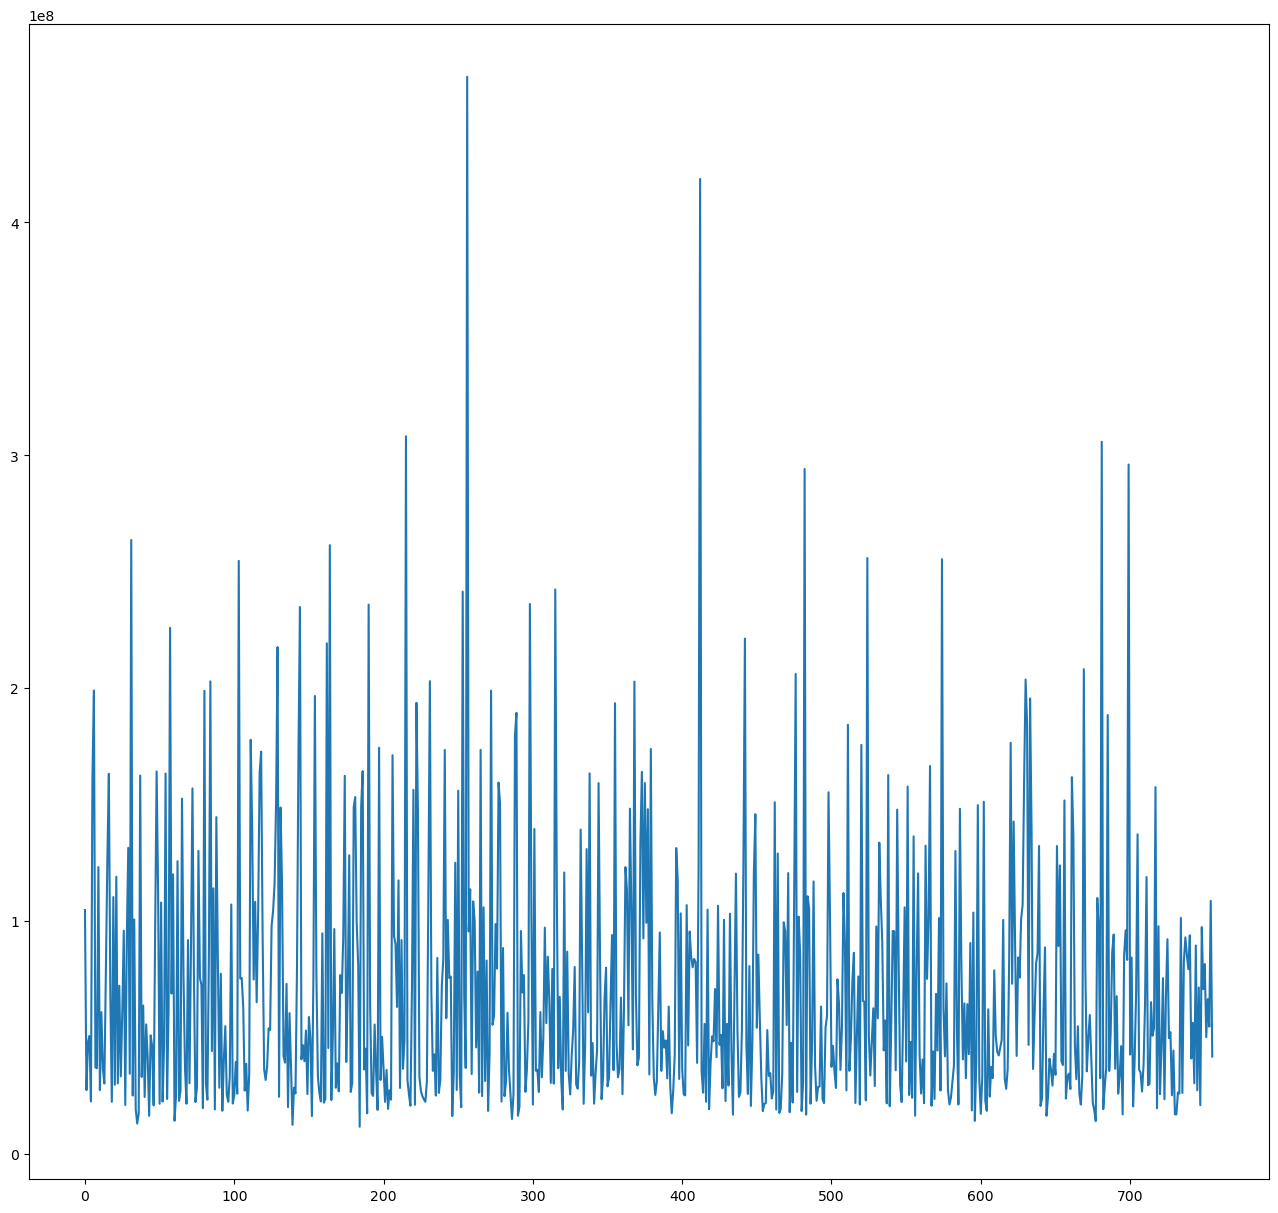

In [71]:
plt.xlabel = ('Time')
plt.ylabel = ('Optimal Price')
plt.title = ('Optimal Price Over Time')


opDF = timeDF['Values']

plt.figure(figsize=(16,15))
plt.plot(opDF)
plt.show()

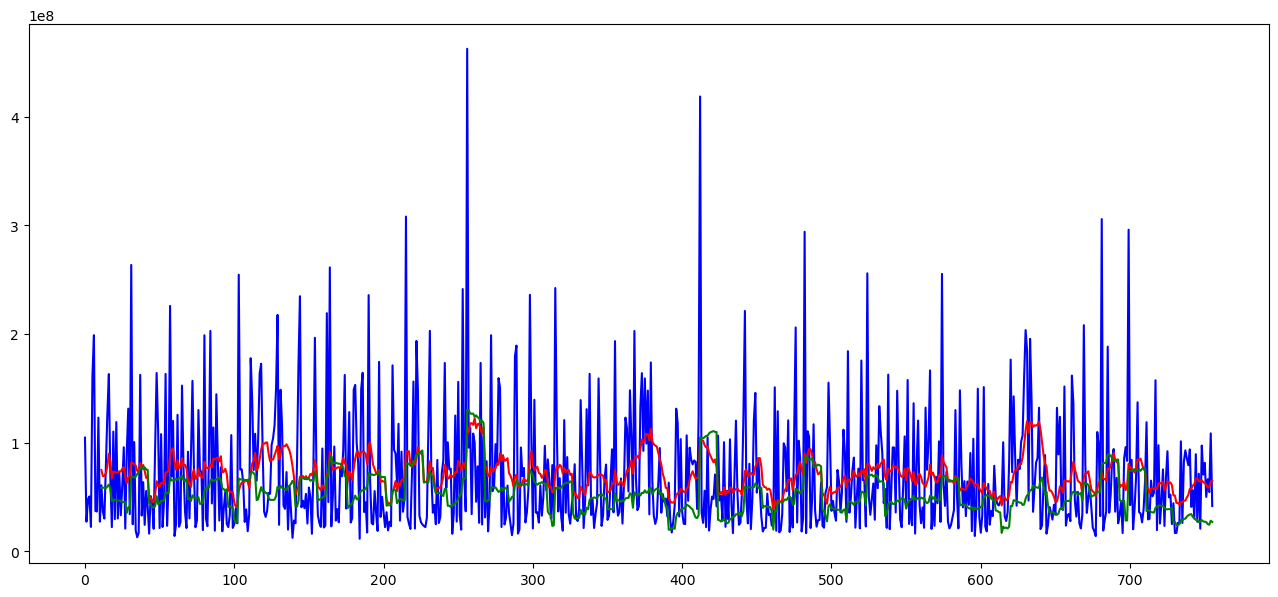

In [72]:
rollmean = opDF.rolling(12).mean()
rollstd = opDF.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(opDF, color = 'blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Mean')
std = plt.plot(rollstd, color='green', label='Standard Deviation')

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose


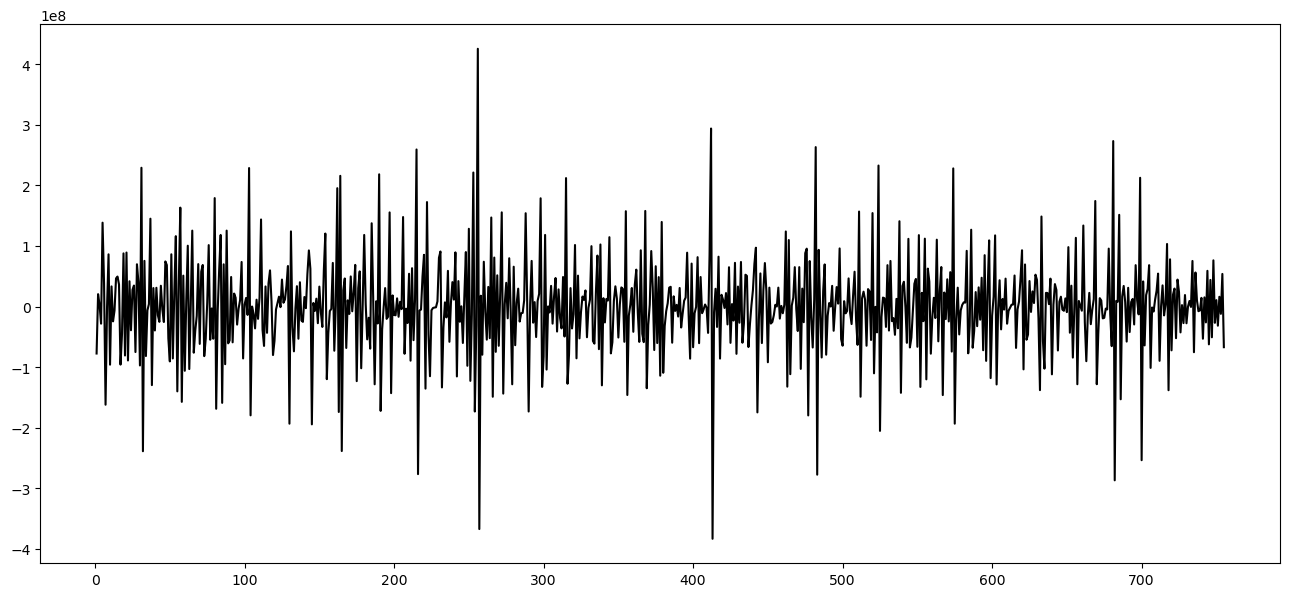

In [74]:
df_diff = opDF - opDF.shift()
df_diff = df_diff.dropna()

plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')

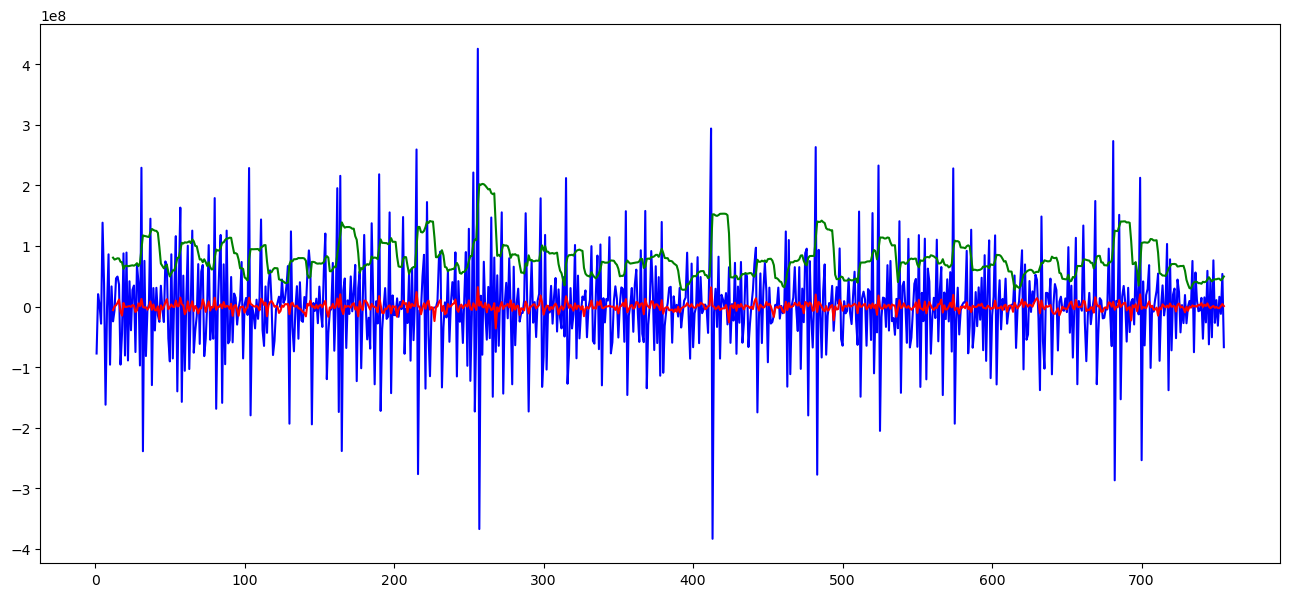

In [75]:
rollmean2 = df_diff.rolling(12).mean()
rollstd2 = df_diff.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(df_diff, color = 'blue', label='Original')
mean = plt.plot(rollmean2, color='red', label='Mean')
std = plt.plot(rollstd2, color='green', label='Standard Deviation')

plt.show()

In [76]:
decompose2 = seasonal_decompose(df_diff, model='additive',period=1)

trend2 =  decompose2.trend
season2 = decompose2.seasonal
resid2 = decompose2.resid

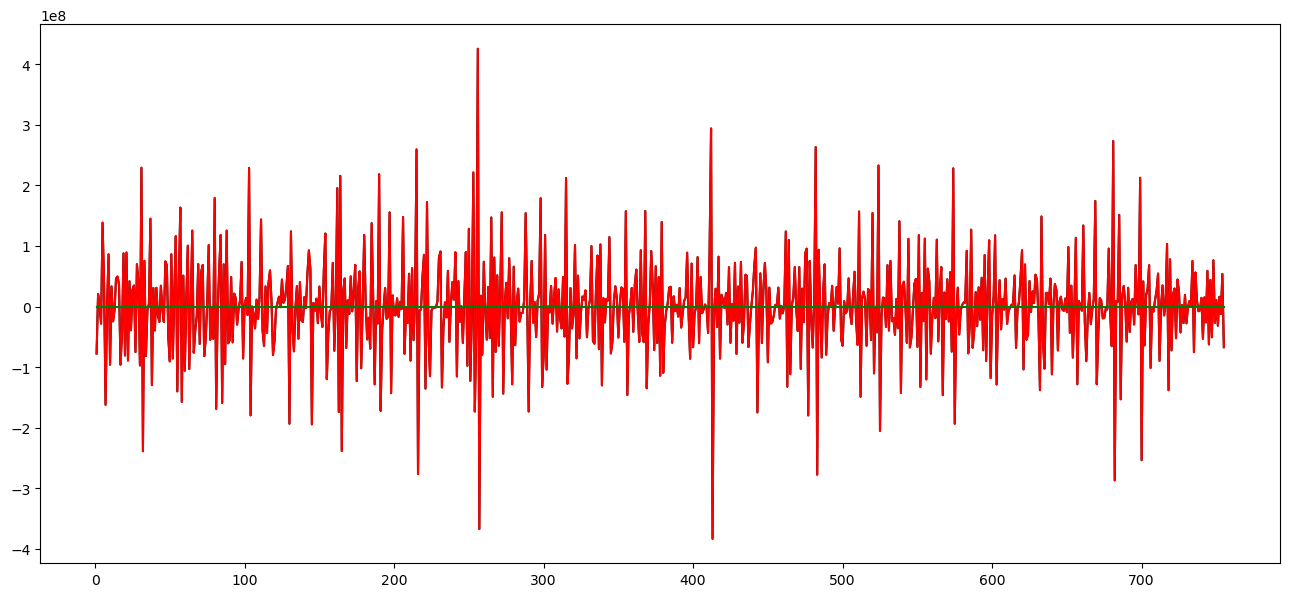

In [77]:
plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')
plt.plot(trend2, label='Trend', color = 'red')
plt.plot(season2, label='Season', color='blue')
plt.plot(resid2, label='Resid', color='green')

plt.show()

## Create An Arima Model (Time Series)

In [78]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_diff, order=(1,1,1))

arima_fit = arima.fit()

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Table 2: Expected results vs Actual Results

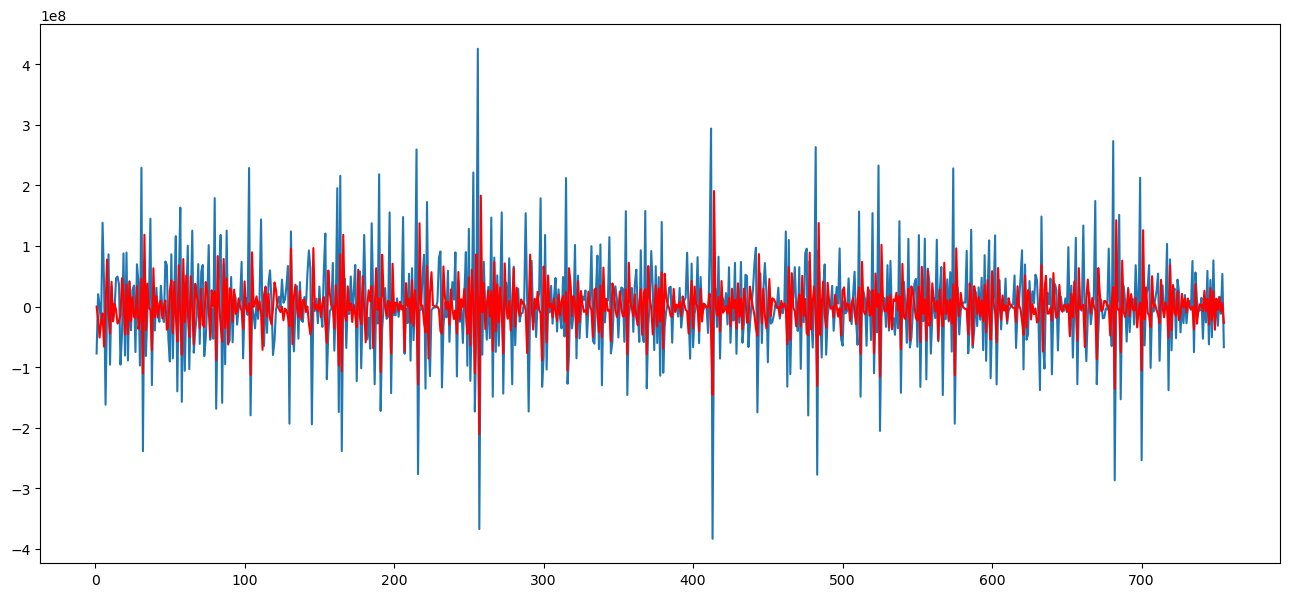

In [81]:
plt.figure(figsize=(16,7))
plt.plot(df_diff)
plt.plot(arima_fit.fittedvalues, color='red')


## Expected Values vs Realized Values

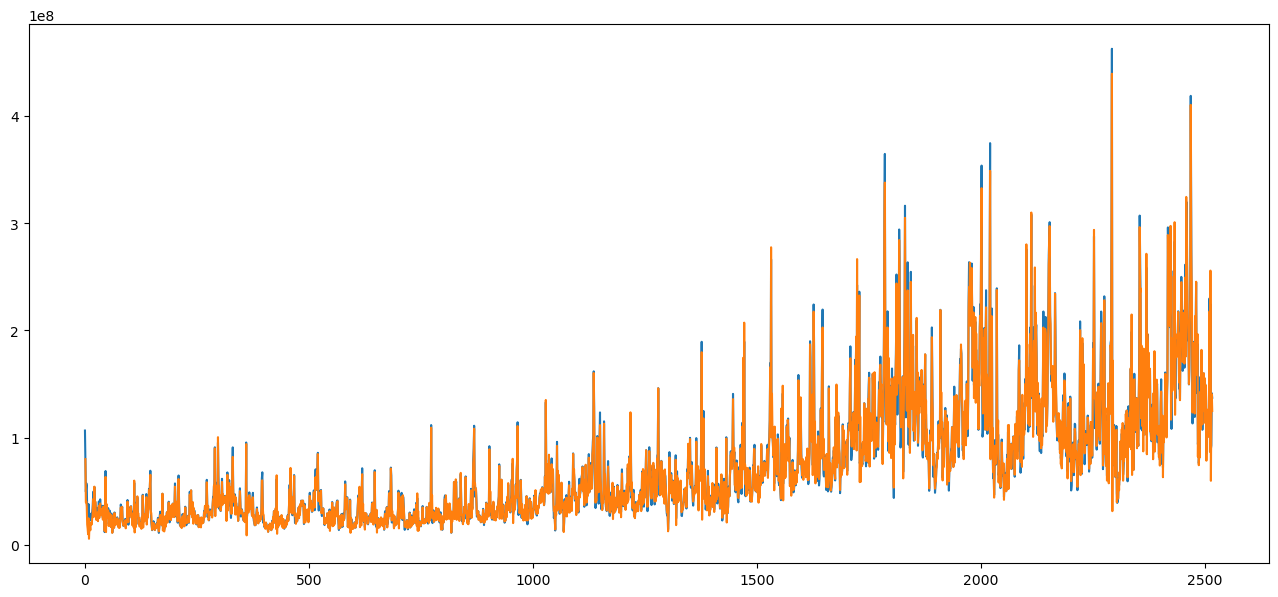

In [252]:
arimaSeries = pd.Series(arima_fit.fittedvalues, copy=True)
arimaSum = arimaSeries.cumsum()

plt.figure(figsize=(16,7))

plt.plot(opDF)
plt.plot(arimaSeries + opDF)